In [37]:
from typing import List
from collections import Counter

In [38]:
def majority_vote(labels: List[str]) -> str:
    '''Assumes that labels are ordered from nearest to farthest'''
    vote_counts = Counter(labels)
    winner, winners_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winners_count])
    if num_winners == 1:
        return winner #unique winner, so return it
    else:
        return majority_vote(labels[:-1]) #tyr again without the farthest

In [39]:
labels = ['a','a', 'b', 'b', 'c', 'd']
majority_vote(labels)

'a'

# KNN classify

In [46]:
from typing import NamedTuple
from linearalgebra import Vector, distance

In [47]:
class LabeledPoint(NamedTuple):
    point: Vector
    label: str
    def knn_classify(k: int, labeled_points: List[LabeledPoint], new_point: Vector) -> str:
        #order the labeled points from nearest to farthest.
        by_distance = sorted(labeled_points, key=lambda lp: distance[lp.point, new_point])
        #find the labels for the k closest
        k_nearest_labels = [lp.label for lp in by_distance[:k]]
        return majority_vote(k_nearest_labels)

# The Iris Dataset

In [61]:
import requests

In [64]:
data = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [65]:
with open('iris.data', 'w') as file:
    file.write(data.text)

In [66]:
from typing import Dict
import csv
from collections import defaultdict

In [80]:
def parse_iris_row(row: List[str]) -> LabeledPoint:
    '''sepal_length, sepal_width, petal_length, petal_width, class'''
    measurements = [float(value) for value in row[:-1]]
    #class is eg 'iris-virginica'; we just want 'virginica'
    label = row[-1].split('-')[-1]
#     print(measurements, label)
    return LabeledPoint(measurements, label)

In [81]:
with open('iris.data') as f:
    reader = csv.reader(f)
    iris_data = [parse_iris_row(row) for row in reader]

In [83]:
points_by_species: Dict[str, List[Vector]] = defaultdict(list)

In [89]:
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

In [92]:
from matplotlib import pyplot as plt

In [102]:
metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [104]:
pairs = [(i, j) for i in range(4) for j in range(4) if i>j]
marks = ['+', '.', 'x']

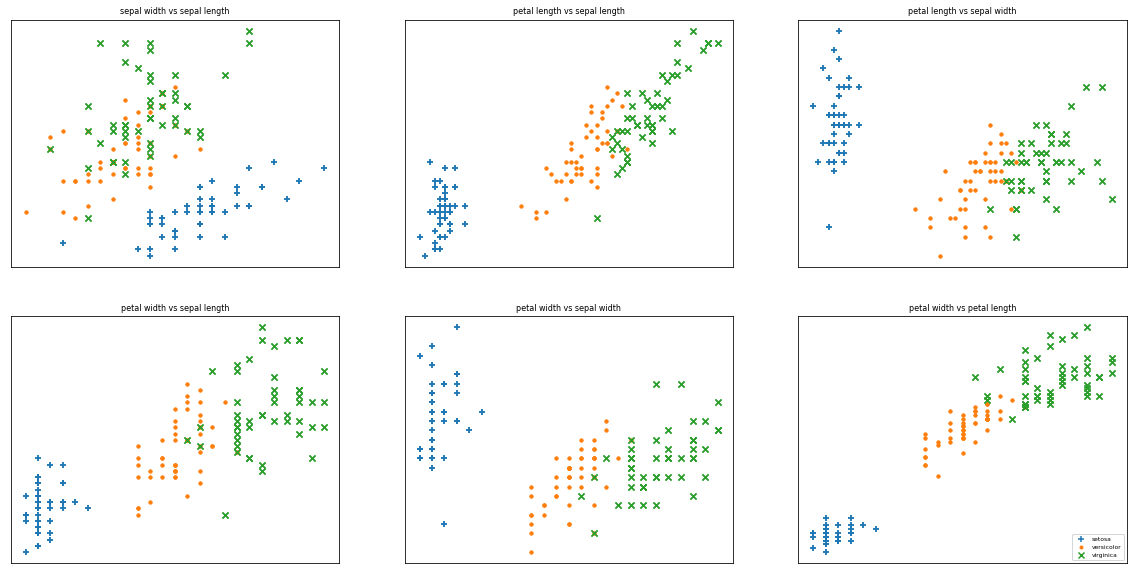

In [119]:
fig, ax = plt.subplots(2,3, figsize=(20,10))

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=species)
            
ax[-1][-1].legend(loc='lower right', prop={'size':6})
plt.show()

# Finally

In [125]:
import random
from machineLearning import split_data

In [126]:
random.seed(12)
iris_train, iris_test = split_data(iris_data, 0.70)

In [127]:
assert len(iris_train) == 0.7*150
assert len(iris_test) == 0.3*150